In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mplt
from matplotlib import rcParams
from matplotlib import rc
rc('mathtext', default='regular') 
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'cm'
rcParams['mathtext.rm'] = 'serif'
rcParams['font.size'] = 12

In [18]:
# Read in all distributed lag results for ED data
lag2016ED = pd.read_csv("C:/Users/olivia.sablan/OneDrive - State of New Mexico/Documents/Data/casecrossoverData/lagged_results/lagged_results2016_KATE_ED.csv")
lag2017ED = pd.read_csv("C:/Users/olivia.sablan/OneDrive - State of New Mexico/Documents/Data/casecrossoverData/lagged_results/lagged_results2017_KATE_ED.csv")
lag2018ED = pd.read_csv("C:/Users/olivia.sablan/OneDrive - State of New Mexico/Documents/Data/casecrossoverData/lagged_results/lagged_results2018_KATE_ED.csv")
lag2019ED = pd.read_csv("C:/Users/olivia.sablan/OneDrive - State of New Mexico/Documents/Data/casecrossoverData/lagged_results/lagged_results2019_KATE_ED.csv")
lag2020ED = pd.read_csv("C:/Users/olivia.sablan/OneDrive - State of New Mexico/Documents/Data/casecrossoverData/lagged_results/lagged_results2020_KATE_ED.csv")
lag2021ED = pd.read_csv("C:/Users/olivia.sablan/OneDrive - State of New Mexico/Documents/Data/casecrossoverData/lagged_results/lagged_results2021_KATE_ED.csv")
lag2022ED = pd.read_csv("C:/Users/olivia.sablan/OneDrive - State of New Mexico/Documents/Data/casecrossoverData/lagged_results/lagged_results2022_KATE_ED.csv")

In [19]:
# Read in all distributed lag results for ESSENCE data
lag2019ESSENCE = pd.read_csv("C:/Users/olivia.sablan/OneDrive - State of New Mexico/Documents/Data/casecrossoverData/lagged_results/lagged_results2019_KATE_ESSENCE.csv")
lag2020ESSENCE = pd.read_csv("C:/Users/olivia.sablan/OneDrive - State of New Mexico/Documents/Data/casecrossoverData/lagged_results/lagged_results2020_KATE_ESSENCE.csv")
lag2021ESSENCE = pd.read_csv("C:/Users/olivia.sablan/OneDrive - State of New Mexico/Documents/Data/casecrossoverData/lagged_results/lagged_results2021_KATE_ESSENCE.csv")
lag2022ESSENCE = pd.read_csv("C:/Users/olivia.sablan/OneDrive - State of New Mexico/Documents/Data/casecrossoverData/lagged_results/lagged_results2022_KATE_ESSENCE.csv")

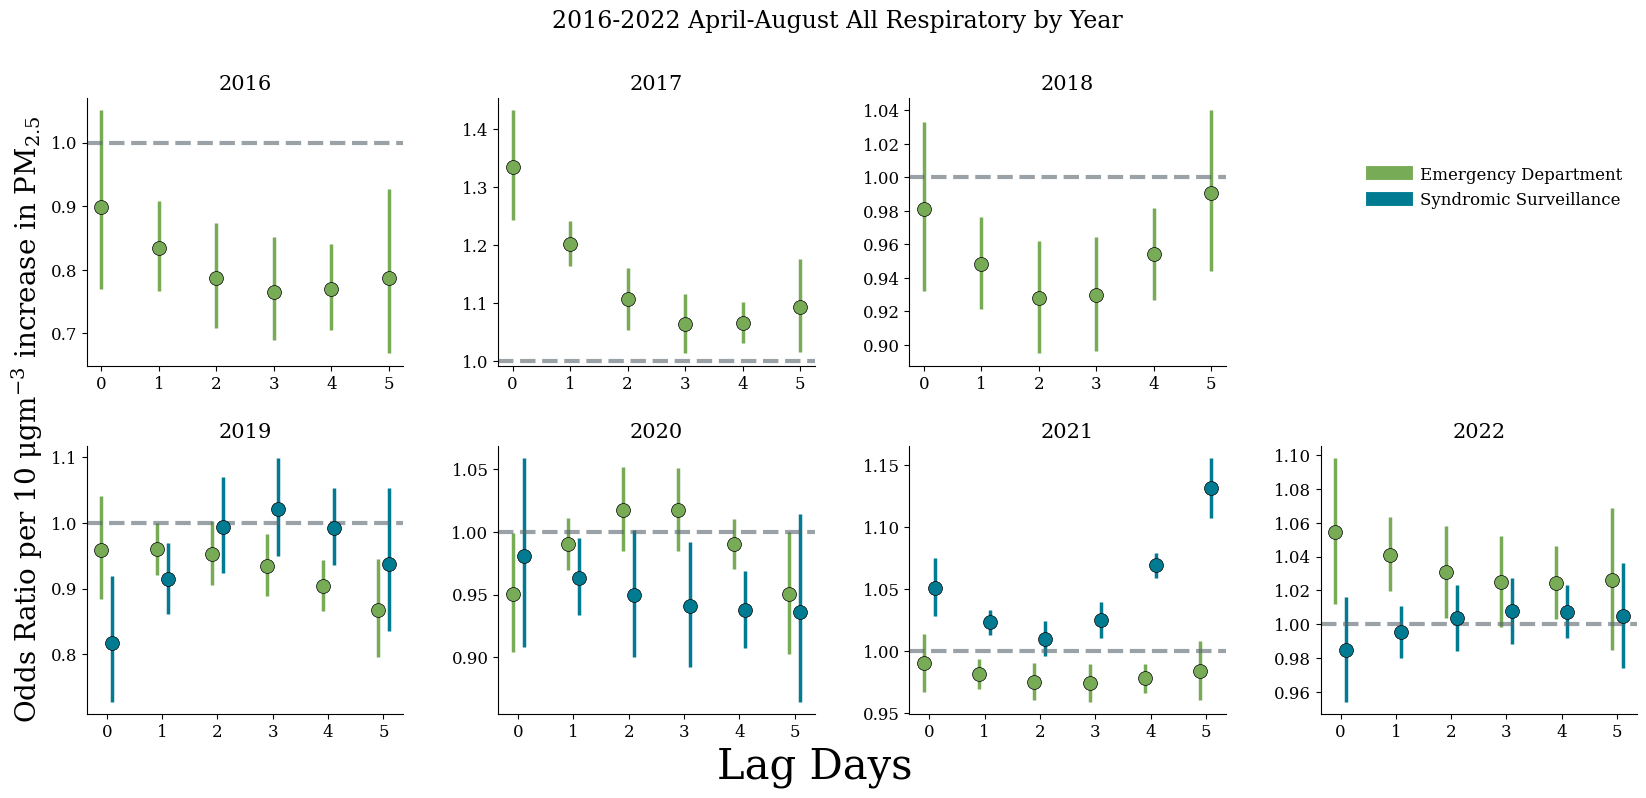

In [23]:
# Loop through plotting of repiratory outcomes for all years
years = ['2016', '2017', '2018', '', '2019', '2020', '2021', '2022']
datasetsED = [lag2016ED, lag2017ED, lag2018ED, '', lag2019ED, lag2020ED, lag2021ED, lag2022ED]
datasetsESSENCE = ['', '', '', '', lag2019ESSENCE, lag2020ESSENCE, lag2021ESSENCE, lag2022ESSENCE]

fig, axs = plt.subplots(ncols=4,nrows=2, figsize=(20,8),
                        gridspec_kw = {'wspace': 0.3, 'hspace': 0.3})
axs=axs.flatten()
plt.suptitle('2016-2022 April-August All Respiratory by Year', fontsize = 17, y = .99)
for i in range(0,8):
        if (i < 3):
            axs[i].scatter(datasetsED[i]['time'][datasetsED[i]['outcome'] == 'allresp1'],datasetsED[i]['odds_ratio'][datasetsED[i]['outcome'] == 'allresp1'], color = 'xkcd:asparagus', 
                           edgecolor = 'k', lw = .5, s = 100, zorder = 4)
            axs[i].vlines(x =datasetsED[i]['time'][datasetsED[i]['outcome'] == 'allresp1'], ymin = datasetsED[i]['lower_95'][datasetsED[i]['outcome'] == 'allresp1'],
                          ymax = datasetsED[i]['upper_95'][datasetsED[i]['outcome'] == 'allresp1'], color = 'xkcd:asparagus', lw = 2.5)
        if ( i == 3):
            axs[i].plot([], [], color = 'xkcd:asparagus', label = 'Emergency Department', lw = 10)
            axs[i].plot([], [], color = 'xkcd:ocean', label = 'Syndromic Surveillance', lw = 10)
            axs[i].legend(bbox_to_anchor = [1,0.8], fontsize = 12, frameon = False)
            axs[i].axis('off')
        if (i >= 4):
            axs[i].scatter(datasetsED[i]['time'][lag2019ED['outcome'] == 'allresp1']-0.1,datasetsED[i]['odds_ratio'][datasetsED[i]['outcome'] == 'allresp1'], 
                           color = 'xkcd:asparagus', edgecolor = 'k', lw = .5, s = 100, zorder = 4)
            axs[i].vlines(x =datasetsED[i]['time'][lag2019ED['outcome'] == 'allresp1']-0.1, ymin = datasetsED[i]['lower_95'][datasetsED[i]['outcome'] == 'allresp1'],
                          ymax = datasetsED[i]['upper_95'][datasetsED[i]['outcome'] == 'allresp1'], color = 'xkcd:asparagus', lw = 2.5)

            axs[i].scatter(datasetsESSENCE[i]['time'][datasetsESSENCE[i]['outcome'] == 'BroadResp']+0.1,datasetsESSENCE[i]['odds_ratio'][datasetsESSENCE[i]['outcome'] == 'BroadResp'],
                            color = 'xkcd:ocean', edgecolor = 'k', lw = .5, s = 100, zorder = 4)
            axs[i].vlines(x =datasetsESSENCE[i]['time'][datasetsESSENCE[i]['outcome'] == 'BroadResp']+0.1, ymin = datasetsESSENCE[i]['lower_95'][datasetsESSENCE[i]['outcome'] == 'BroadResp'],
                          ymax = datasetsESSENCE[i]['upper_95'][datasetsESSENCE[i]['outcome'] == 'BroadResp'], color = 'xkcd:ocean', lw = 2.5)
        if (i == 4):
            axs[i].set_ylabel('Odds Ratio per 10 $\mu g m^{-3}$ increase in PM$_{2.5}$', fontsize = 20, y = 1.1)
        if (i == 5):
             axs[i].set_xlabel('Lag Days', fontsize = 30, x = 1)
        if (i == 0) |(i == 1) | (i == 2) | (i == 4) | (i == 5) | (i == 6) |(i == 7):
            axs[i].axhline(y = 1, color = 'xkcd:slate gray', ls = '--', lw = 3, alpha = .6)
            axs[i].set_xticks(np.arange(0,6, 1));
        axs[i].set_title(years[i], fontsize = 15)
        axs[i].spines[['right', 'top']].set_visible(False)
fig.savefig('../Figures/AllRespByYear.png', dpi = 300, bbox_inches = 'tight')

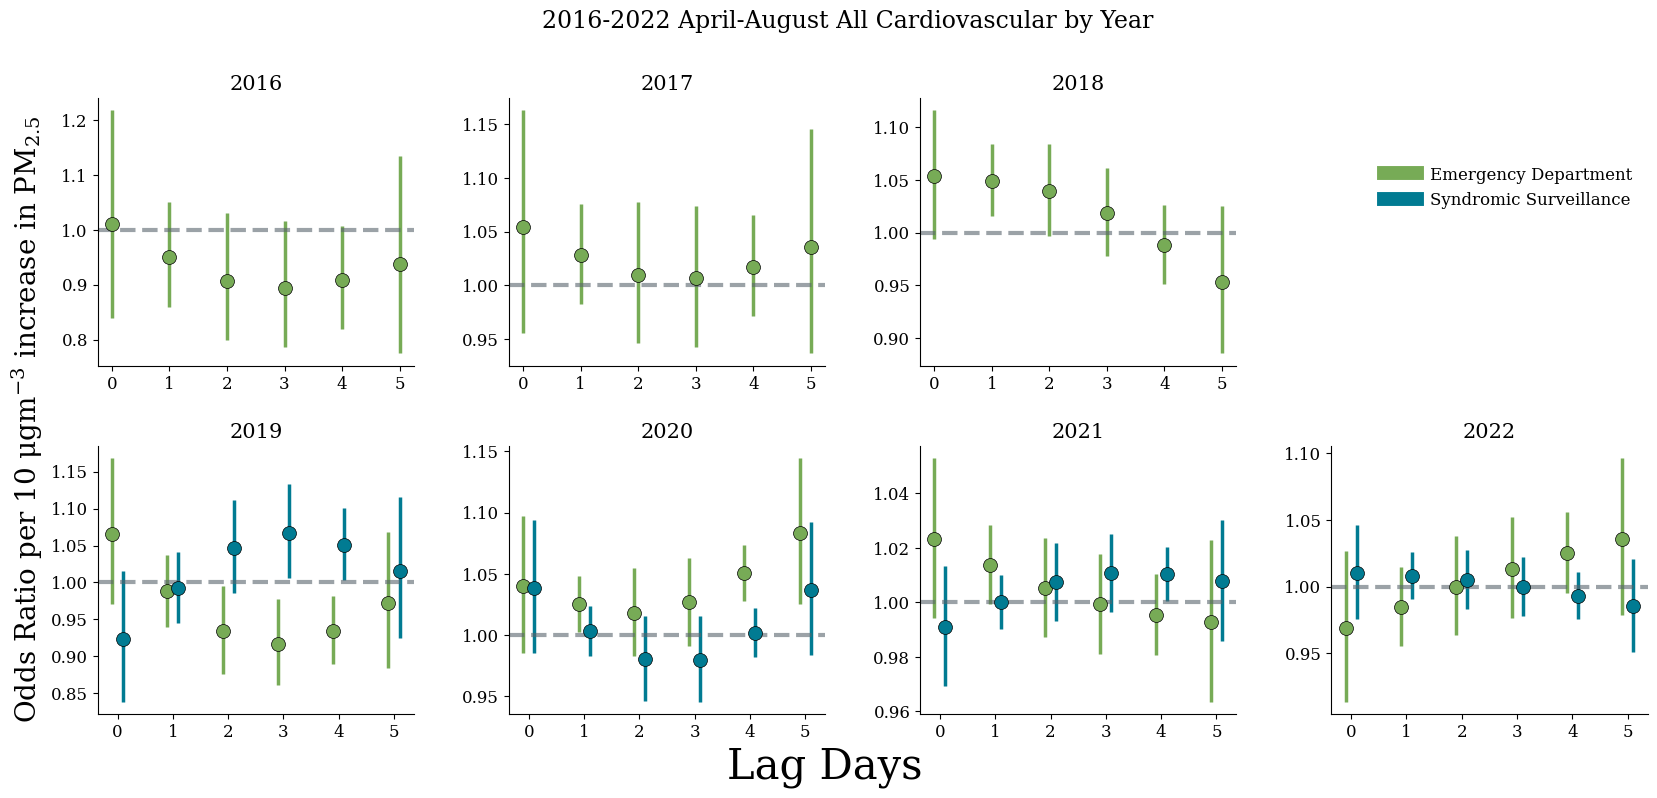

In [21]:
# Repeat plotting with cardio
fig, axs = plt.subplots(ncols=4,nrows=2, figsize=(20,8),
                        gridspec_kw = {'wspace': 0.3, 'hspace': 0.3})
axs=axs.flatten()
plt.suptitle('2016-2022 April-August All Cardiovascular by Year', fontsize = 17, y = .99)
for i in range(0,8):
        if (i < 3):
            axs[i].scatter(datasetsED[i]['time'][datasetsED[i]['outcome'] == 'allcardio1'],datasetsED[i]['odds_ratio'][datasetsED[i]['outcome'] == 'allcardio1'], color = 'xkcd:asparagus', 
                           edgecolor = 'k', lw = .5, s = 100, zorder = 4)
            axs[i].vlines(x =datasetsED[i]['time'][datasetsED[i]['outcome'] == 'allcardio1'], ymin = datasetsED[i]['lower_95'][datasetsED[i]['outcome'] == 'allcardio1'],
                          ymax = datasetsED[i]['upper_95'][datasetsED[i]['outcome'] == 'allcardio1'], color = 'xkcd:asparagus', lw = 2.5)
        if ( i == 3):
            axs[i].plot([], [], color = 'xkcd:asparagus', label = 'Emergency Department', lw = 10)
            axs[i].plot([], [], color = 'xkcd:ocean', label = 'Syndromic Surveillance', lw = 10)
            axs[i].legend(bbox_to_anchor = [1,0.8], fontsize = 12, frameon = False)
            axs[i].axis('off')
        if (i >= 4):
            axs[i].scatter(datasetsED[i]['time'][lag2019ED['outcome'] == 'allcardio1']-0.1,datasetsED[i]['odds_ratio'][datasetsED[i]['outcome'] == 'allcardio1'], 
                           color = 'xkcd:asparagus', edgecolor = 'k', lw = .5, s = 100, zorder = 4)
            axs[i].vlines(x =datasetsED[i]['time'][lag2019ED['outcome'] == 'allcardio1']-0.1, ymin = datasetsED[i]['lower_95'][datasetsED[i]['outcome'] == 'allcardio1'],
                          ymax = datasetsED[i]['upper_95'][datasetsED[i]['outcome'] == 'allcardio1'], color = 'xkcd:asparagus', lw = 2.5)

            axs[i].scatter(datasetsESSENCE[i]['time'][datasetsESSENCE[i]['outcome'] == 'Cardio']+0.1,datasetsESSENCE[i]['odds_ratio'][datasetsESSENCE[i]['outcome'] == 'Cardio'],
                            color = 'xkcd:ocean', edgecolor = 'k', lw = .5, s = 100, zorder = 4)
            axs[i].vlines(x =datasetsESSENCE[i]['time'][datasetsESSENCE[i]['outcome'] == 'Cardio']+0.1, ymin = datasetsESSENCE[i]['lower_95'][datasetsESSENCE[i]['outcome'] == 'Cardio'],
                          ymax = datasetsESSENCE[i]['upper_95'][datasetsESSENCE[i]['outcome'] == 'Cardio'], color = 'xkcd:ocean', lw = 2.5)
        if (i == 4):
            axs[i].set_ylabel('Odds Ratio per 10 $\mu g m^{-3}$ increase in PM$_{2.5}$', fontsize = 20, y = 1.1)
        if (i == 5):
             axs[i].set_xlabel('Lag Days', fontsize = 30, x = 1)
        if (i == 0) |(i == 1) | (i == 2) | (i == 4) | (i == 5) | (i == 6) |(i == 7):
            axs[i].axhline(y = 1, color = 'xkcd:slate gray', ls = '--', lw = 3, alpha = .6)
            axs[i].set_xticks(np.arange(0,6, 1));
        axs[i].set_title(years[i], fontsize = 15)
        axs[i].spines[['right', 'top']].set_visible(False)
fig.savefig('../Figures/AllCardioByYear.png', dpi = 300, bbox_inches = 'tight')

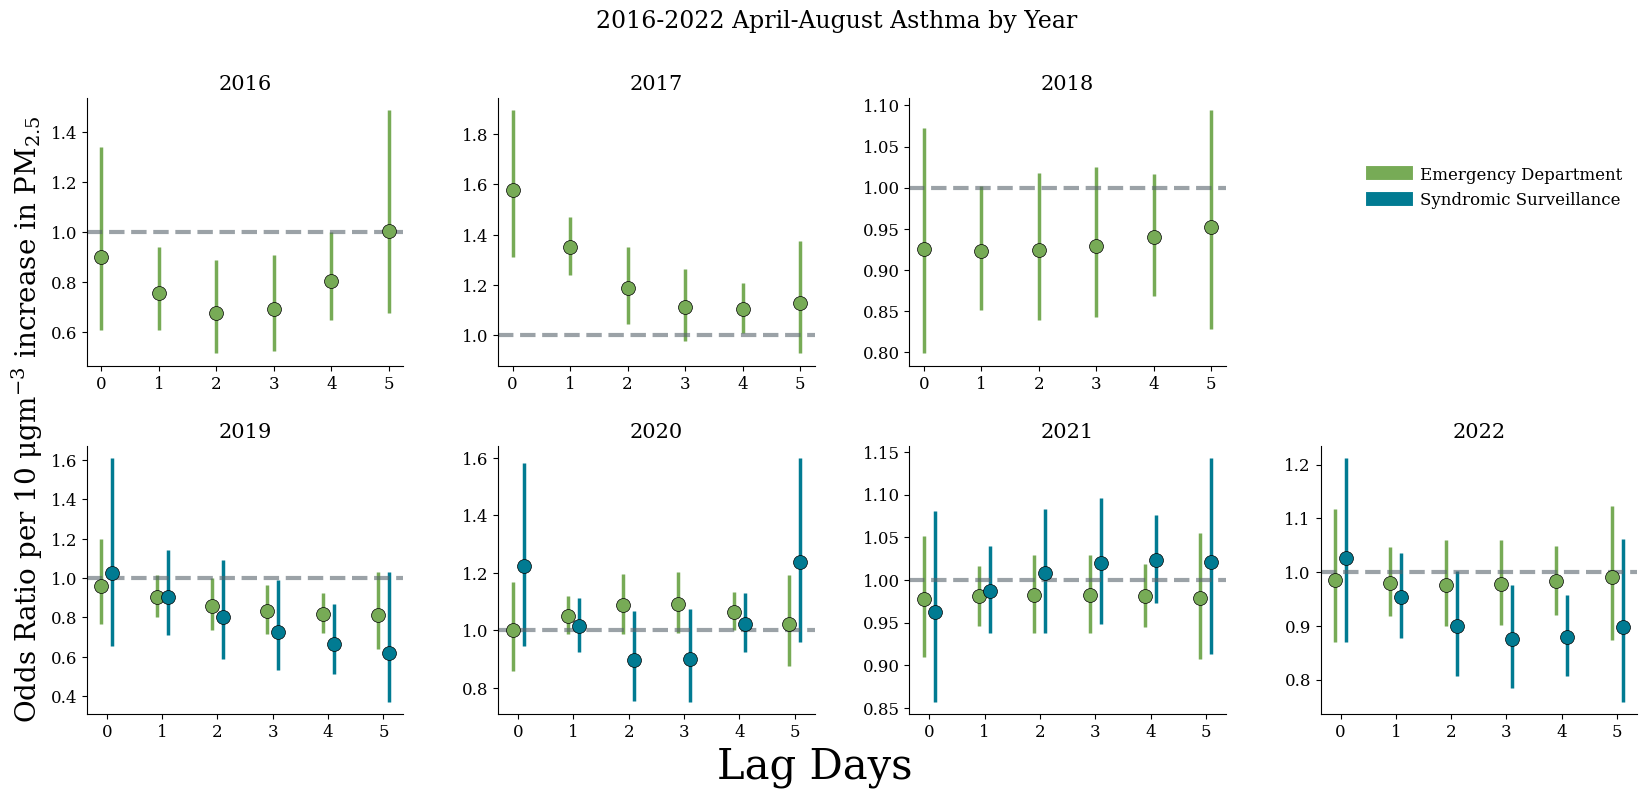

In [22]:
# Repeat again for asthma
fig, axs = plt.subplots(ncols=4,nrows=2, figsize=(20,8),
                        gridspec_kw = {'wspace': 0.3, 'hspace': 0.3})
axs=axs.flatten()
plt.suptitle('2016-2022 April-August Asthma by Year', fontsize = 17, y = .99)
for i in range(0,8):
        if (i < 3):
            axs[i].scatter(datasetsED[i]['time'][datasetsED[i]['outcome'] == 'asthma1'],datasetsED[i]['odds_ratio'][datasetsED[i]['outcome'] == 'asthma1'], color = 'xkcd:asparagus', 
                           edgecolor = 'k', lw = .5, s = 100, zorder = 4)
            axs[i].vlines(x =datasetsED[i]['time'][datasetsED[i]['outcome'] == 'asthma1'], ymin = datasetsED[i]['lower_95'][datasetsED[i]['outcome'] == 'asthma1'],
                          ymax = datasetsED[i]['upper_95'][datasetsED[i]['outcome'] == 'asthma1'], color = 'xkcd:asparagus', lw = 2.5)
        if ( i == 3):
            axs[i].plot([], [], color = 'xkcd:asparagus', label = 'Emergency Department', lw = 10)
            axs[i].plot([], [], color = 'xkcd:ocean', label = 'Syndromic Surveillance', lw = 10)
            axs[i].legend(bbox_to_anchor = [1,0.8], fontsize = 12, frameon = False)
            axs[i].axis('off')
        if (i >= 4):
            axs[i].scatter(datasetsED[i]['time'][lag2019ED['outcome'] == 'asthma1']-0.1,datasetsED[i]['odds_ratio'][datasetsED[i]['outcome'] == 'asthma1'], 
                           color = 'xkcd:asparagus', edgecolor = 'k', lw = .5, s = 100, zorder = 4)
            axs[i].vlines(x =datasetsED[i]['time'][lag2019ED['outcome'] == 'asthma1']-0.1, ymin = datasetsED[i]['lower_95'][datasetsED[i]['outcome'] == 'asthma1'],
                          ymax = datasetsED[i]['upper_95'][datasetsED[i]['outcome'] == 'asthma1'], color = 'xkcd:asparagus', lw = 2.5)

            axs[i].scatter(datasetsESSENCE[i]['time'][datasetsESSENCE[i]['outcome'] == 'Asthma']+0.1,datasetsESSENCE[i]['odds_ratio'][datasetsESSENCE[i]['outcome'] == 'Asthma'],
                            color = 'xkcd:ocean', edgecolor = 'k', lw = .5, s = 100, zorder = 4)
            axs[i].vlines(x =datasetsESSENCE[i]['time'][datasetsESSENCE[i]['outcome'] == 'Asthma']+0.1, ymin = datasetsESSENCE[i]['lower_95'][datasetsESSENCE[i]['outcome'] == 'Asthma'],
                          ymax = datasetsESSENCE[i]['upper_95'][datasetsESSENCE[i]['outcome'] == 'Asthma'], color = 'xkcd:ocean', lw = 2.5)
        if (i == 4):
            axs[i].set_ylabel('Odds Ratio per 10 $\mu g m^{-3}$ increase in PM$_{2.5}$', fontsize = 20, y = 1.1)
        if (i == 5):
             axs[i].set_xlabel('Lag Days', fontsize = 30, x = 1)
        if (i == 0) |(i == 1) | (i == 2) | (i == 4) | (i == 5) | (i == 6) |(i == 7):
            axs[i].axhline(y = 1, color = 'xkcd:slate gray', ls = '--', lw = 3, alpha = .6)
            axs[i].set_xticks(np.arange(0,6, 1));
        axs[i].set_title(years[i], fontsize = 15)
        axs[i].spines[['right', 'top']].set_visible(False)
fig.savefig('../Figures/AllCardioByAsthma.png', dpi = 300, bbox_inches = 'tight')